In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [2]:
data = pd.read_csv("spam.csv", encoding = "latin-1")

In [3]:
data.shape

(5572, 5)

In [4]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
1800,ham,excellent. I spent &lt;#&gt; years in the Ai...,NaN,NaN,NaN
697,ham,meet you in corporation st outside gap Û_ you...,NaN,NaN,NaN
23,ham,Aft i finish my lunch then i go str down lor. ...,NaN,NaN,NaN
4154,spam,Want a new Video Phone? 750 anytime any networ...,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data = data.drop(["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], axis = 1)

In [7]:
data.sample(5)

,v1,v2
2498,ham,"I know where the &lt;#&gt; is, I'll be there..."
1072,spam,Dear U've been invited to XCHAT. This is our f...
3805,spam,URGENT! We are trying to contact you. Last wee...
3278,ham,Solve d Case : A Man Was Found Murdered On &l...
1457,spam,CLAIRE here am havin borin time & am now alone...


In [8]:
data = data.rename(columns = {"v1":"label", "v2":"message"})

In [9]:
data.sample()

,label,message
1213,ham,"Yeah, probably but not sure. Ilol let u know, ..."


In [10]:
data.isnull().sum()

label      0
message    0
dtype: int64

EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
len(data[data["label"] == "ham"])

4825

In [13]:
len(data[data["label"] == "spam"])

747

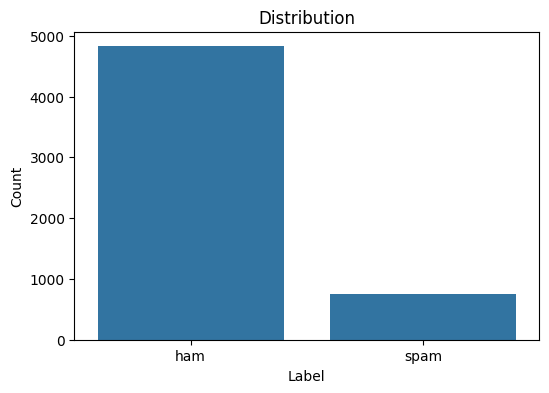

In [14]:
plt.figure(figsize = (6,4))
sns.countplot(x = "label", data = data)
plt.title("Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [15]:
data["message_length"] = data["message"].apply(len)

In [16]:
data.head()

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


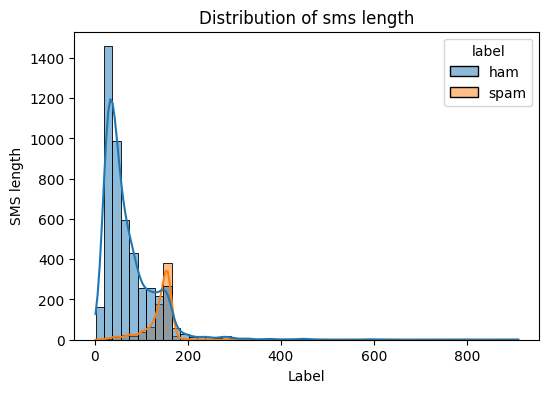

In [17]:
plt.figure(figsize = (6,4))
sns.histplot(x = "message_length", data = data, hue = "label", bins = 50, kde = True)
plt.title("Distribution of sms length")
plt.xlabel("Label")
plt.ylabel("SMS length")
plt.show()

TEXT PREPROCESSING

In [18]:
import re
def remove_html_tags(text):
    clean_text = re.sub(r"<[^>]*>","", text)
    return clean_text
data["message"] =data["message"].apply(remove_html_tags)    


In [19]:
data.head()

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
def tokenize_text(text):
    tokens  = word_tokenize(text)
    return tokens
data["message"] = data["message"].apply(tokenize_text)    

In [22]:
data.head()

,label,message,message_length
0,ham,"[Go, until, jurong, point, ,, crazy, .., Avail...",111
1,ham,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29
2,spam,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155
3,ham,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49
4,ham,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61


In [23]:
data["message"][0]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [24]:
# remove the special character

In [25]:
def remove_special_characters(tokens):
    clean_tokens = [word for word in tokens if word.isalnum()]
    return clean_tokens
data["message"] = data["message"].apply(remove_special_characters)    

In [26]:
data["message"][0]

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [27]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stopwords = set(stopwords.words("english"))

In [29]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [30]:
def remove_stopwords(tokens):
    filtered_words = [word for word in tokens if word not in stopwords]
    return filtered_words
data["message"] = data["message"].apply(remove_stopwords)    

In [31]:
data["message"][0]

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

In [32]:
st = PorterStemmer()
def stem_words(tokens):
    stem_words = [st.stem(word) for word in tokens]
    return stem_words

data["message"]  = data["message"].apply(stem_words)   

In [33]:
data["message"][0]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [34]:
data.head()

,label,message,message_length
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",111
1,ham,"[ok, lar, joke, wif, u, oni]",29
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",49
4,ham,"[nah, i, think, goe, usf, live, around, though]",61


In [35]:
data["message"] = data["message"].apply(lambda x:' '.join(map(str,x)).lower() )

In [36]:
data.head()

,label,message,message_length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah i think goe usf live around though,61


Creating ML Model 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
x = data["message"]
y = data["label"]

In [39]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["message"])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)

In [41]:
# Support Vectir Classifier

from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [42]:
# model prediction accuracy

y_pred_svc = svc_model.predict(x_test)
print("Accuracy_Score", accuracy_score(y_test, y_pred_svc))
print("Classification Report", classification_report(y_test, y_pred_svc))


Accuracy_Score 0.97847533632287
Classification Report               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       967
        spam       1.00      0.84      0.91       148

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [43]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rmc_model = RandomForestClassifier(n_estimators = 100, random_state = 30)
rmc_model.fit(x_train, y_train)

RandomForestClassifier(random_state=30)

In [44]:
y_pred_rmc =rmc_model.predict(x_test)
print("Accuracy_Score", accuracy_score(y_test, y_pred_rmc))
print("Classification Report", classification_report(y_test, y_pred_rmc))


Accuracy_Score 0.9775784753363229
Classification Report               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       967
        spam       1.00      0.83      0.91       148

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [45]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [46]:
y_pred_lr =lr_model.predict(x_test)
print("Accuracy_Score", accuracy_score(y_test, y_pred_lr))
print("Classification Report", classification_report(y_test, y_pred_lr))


Accuracy_Score 0.9605381165919282
Classification Report               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       967
        spam       0.99      0.71      0.83       148

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [47]:
import pickle
with open("rmc_model.pkl", "wb") as model_file:
    pickle.dump(rmc_model, model_file)


In [49]:
with open("tfidf_vectorizer.pkl", "wb") as model_file:
    pickle.dump(vectorizer, model_file)